# CS 525 Assignment 1
Sirut Buasai, sbuasai2@wpi.edu

### Imports and Downloads

In [92]:
# libraries
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

# NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sirutbuasai/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Data retrieval and processing

In [68]:
# load data from csv files
real_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')

In [69]:
# clean real data by removing punctuations and special characters and convert string to lower case
real_data = real_data.replace(r'[^A-Za-z0-9]+', ' ', regex=True)
real_data['text'] = real_data['text'].str.lower()
real_data.head()

,title,text,subject,date
0,As U S budget fight looms Republicans flip the...,washington reuters the head of a conservative ...,politicsNews,December 31 2017
1,U S military to accept transgender recruits on...,washington reuters transgender people will be ...,politicsNews,December 29 2017
2,Senior U S Republican senator Let Mr Mueller d...,washington reuters the special counsel investi...,politicsNews,December 31 2017
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geor...,politicsNews,December 30 2017
4,Trump wants Postal Service to charge much more...,seattle washington reuters president donald tr...,politicsNews,December 29 2017


In [70]:
# clean fake data by removing punctuations and special characters and convert string to lower case
fake_data = fake_data.replace(r'[^A-Za-z0-9]+', ' ', regex=True)
fake_data['text'] = fake_data['text'].str.lower()
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year ...,donald trump just couldn t wish all americans ...,News,December 31 2017
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,December 31 2017
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,News,December 30 2017
3,Trump Is So Obsessed He Even Has Obama s Name...,on christmas day donald trump announced that h...,News,December 29 2017
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,December 25 2017


## Task 1: Explore Essential Information from Text Data and Preprocessing
### Text Tokenization

In [71]:
# tokenize real texts
real_data['tokenized_text'] = real_data['text'].apply(nltk.tokenize.word_tokenize)
real_tokens = real_data['tokenized_text'].explode()
real_tokens.dropna(inplace=True)
real_tokens = real_tokens.to_list()

# tokenize fake texts
fake_data['tokenized_text'] = fake_data['text'].apply(nltk.tokenize.word_tokenize)
fake_tokens = fake_data['tokenized_text'].explode()
fake_tokens.dropna(inplace=True)
fake_tokens = fake_tokens.to_list()

# create collection of tokens from both real and fake tokens
collection_tokens = real_tokens + fake_tokens

print(f"Number of real tokens:\t{len(real_tokens)}")
print(f"Number of fake tokens:\t{len(fake_tokens)}")
print(f"Total number of tokens:\t{len(collection_tokens)}")

Number of real tokens:	8435968
Number of fake tokens:	10251160
Total number of tokens:	18687128


### Stop Word Removal

In [72]:
# remove stop words
stop_words = nltk.corpus.stopwords.words('english')
real_stop = [x for x in real_tokens if x not in stop_words]
fake_stop = [x for x in fake_tokens if x not in stop_words]
collection_stop = [x for x in collection_tokens if x not in stop_words]

print(f"Number of real tokens after stop word removal:\t{len(real_stop)}")
print(f"Number of fake tokens after stop word removal:\t{len(fake_stop)}")
print(f"Total number of tokens after stop word removal:\t{len(collection_stop)}")

Number of real tokens after stop word removal:	5037632
Number of fake tokens after stop word removal:	5724253
Total number of tokens after stop word removal:	10761885


### Text Lemminization

In [73]:
# lemmatize tokens
lemmatizer = nltk.stem.WordNetLemmatizer()
real_lemm = [lemmatizer.lemmatize(x) for x in real_stop]
fake_lemm = [lemmatizer.lemmatize(x) for x in fake_stop]
collection_lemm = [lemmatizer.lemmatize(x) for x in collection_stop]

print(f"Number of real tokens after lemminization:\t{len(real_stop)}")
print(f"Number of fake tokens after lemminization:\t{len(fake_stop)}")
print(f"Total number of tokens after lemminization:\t{len(collection_stop)}")

Number of real tokens after lemminization:	5037632
Number of fake tokens after lemminization:	5724253
Total number of tokens after lemminization:	10761885


### Calculate Top 100 Common Words and WordCloud Analysis

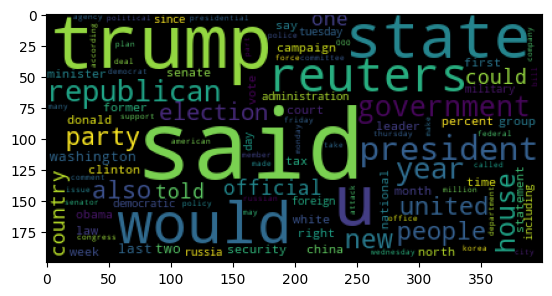

In [74]:
# retrieve top 100 most common words for real data
real_freq = nltk.FreqDist(real_lemm).most_common(100)

# download tables to excel spreadsheet
real_df = pd.DataFrame(data=dict(real_freq), index=[0])
real_df = (real_df.T)
real_df.to_excel('real_freq.xlsx')

# create wordcloud for analysis
real_wordcloud = WordCloud().generate_from_frequencies(dict(real_freq))
plt.imshow(real_wordcloud)
plt.show()

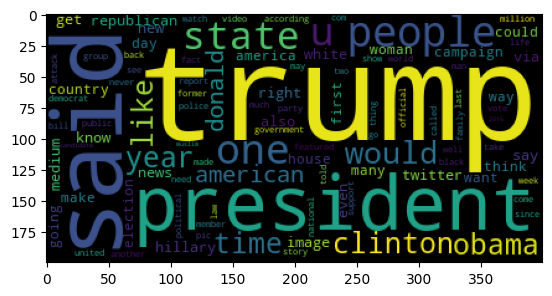

In [75]:
# retrieve top 100 most common words for fake data
fake_freq = nltk.FreqDist(fake_lemm).most_common(100)

# download tables to excel spreadsheet
fake_df = pd.DataFrame(data=dict(fake_freq), index=[0])
fake_df = (fake_df.T)
fake_df.to_excel('fake_freq.xlsx')

# create wordcloud for analysis
fake_wordcloud = WordCloud().generate_from_frequencies(dict(fake_freq))
plt.imshow(fake_wordcloud)
plt.show()

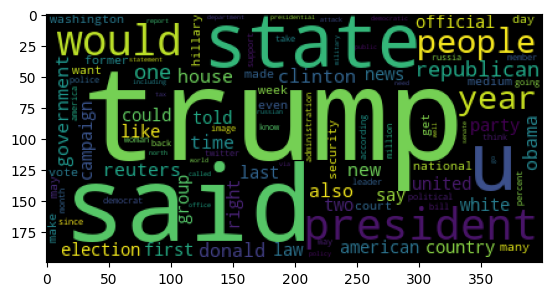

In [76]:
# retrieve top 100 most common words for collection data
collection_freq = nltk.FreqDist(collection_lemm).most_common(100)

# download tables to excel spreadsheet
collection_df = pd.DataFrame(data=dict(collection_freq), index=[0])
collection_df = (collection_df.T)
collection_df.to_excel('collection_freq.xlsx')

# create wordcloud for analysis
collection_wordcloud = WordCloud().generate_from_frequencies(dict(collection_freq))
plt.imshow(collection_wordcloud)
plt.show()

## Task 2: Build Machine Learning Model

In [96]:
# create labels for real and fake data
real_data['label'] = 1
fake_data['label'] = 0

# extract text and label
real_raw = real_data[['text','tokenized_text', 'label']]
fake_raw = fake_data[['text','tokenized_text', 'label']]

# combine the real and fake data
data_raw = pd.concat([real_raw, fake_raw])
data_raw = data_raw.sample(frac=1).reset_index(drop=True)
data_raw.head()

,text,label
0,vladivostok russia reuters russian president v...,1
1,lany czech republic reuters czech election win...,1
2,watch well organized anti trump terrorists pul...,0
3,21st century wire says defense news said that ...,0
4,washington reuters russia s attempts to interf...,1


### Create Training Testing Split

In [78]:
# split data into training and testing set with 70-30 split ratio
train_x, test_x, train_y, test_y = train_test_split(data_raw['text'], data_raw['label'], test_size=0.3)

### TF-IDF Feature Set

In [79]:
# create TF-IDF feature set
tfidf_vect = TfidfVectorizer()

tfidf_train_x = tfidf_vect.fit_transform(train_x)
tfidf_test_x = tfidf_vect.transform(test_x)

#### Logistic Regression on TF-IDF Feature Set

In [87]:
# perform logistic regresstion model on TF-IDF feature
tfidf_log = LogisticRegression(solver='liblinear')

# train model on training set
tfidf_log.fit(tfidf_train_x, train_y)

# test model on testing set
prediction_y = tfidf_log.predict(tfidf_test_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9837169250039142
Recall score:		0.9882038376848066
Accuracy score:		0.9867112100965107


#### Multinomial Naive Bayes on TF-IDF Feature Set

In [83]:
# perform multinomial naive bayes model on TF-IDF feature
tfidf_mnb = MultinomialNB()

# train model on training set
tfidf_mnb.fit(tfidf_train_x, train_y)

# test model on testing set
prediction_y = tfidf_mnb.predict(tfidf_test_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9398663697104677
Recall score:		0.9292230261088392
Accuracy score:		0.9385300668151447


### Bag of Words Feature Set

In [84]:
# create Bag of Words feature set
bow_vect = CountVectorizer()

bow_train_x = bow_vect.fit_transform(train_x)
bow_test_x = bow_vect.transform(test_x)

#### Logistic Regression on Bag of Words Feature Set

In [86]:
# perform logistic regresstion model on Bag of Words feature
bow_log = LogisticRegression(solver='liblinear')

# train model on training set
bow_log.fit(bow_train_x, train_y)

# test model on testing set
prediction_y = bow_log.predict(bow_test_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9934158959084496
Recall score:		0.9966970745517458
Accuracy score:		0.9953229398663697


#### Multinomial Naive Bayes on Bag of Words Feature Set

In [88]:
# perform logistic regresstion model on Bag of Words feature
bow_mnb = MultinomialNB()

# train model on training set
bow_mnb.fit(bow_train_x, train_y)

# test model on testing set
prediction_y = bow_mnb.predict(bow_test_x)

print(f"Precision score:\t{precision_score(test_y, prediction_y)}")
print(f"Recall score:\t\t{recall_score(test_y, prediction_y)}")
print(f"Accuracy score:\t\t{accuracy_score(test_y, prediction_y)}")

Precision score:	0.9442286779555694
Recall score:		0.9559609940232777
Accuracy score:		0.9525612472160356


### Confusion Matrix on Top 2 Models
#### Rank 1: Logistic Regression on Bag of Words Feature Set

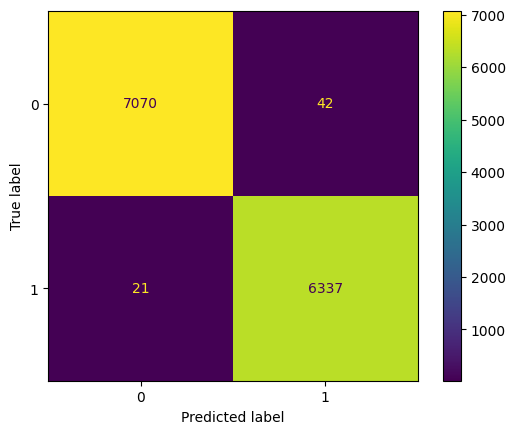

In [95]:
ConfusionMatrixDisplay.from_estimator(bow_log, bow_test_x, test_y)

#### Rank 2: Logistic Regression on TF-IDF Feature Set

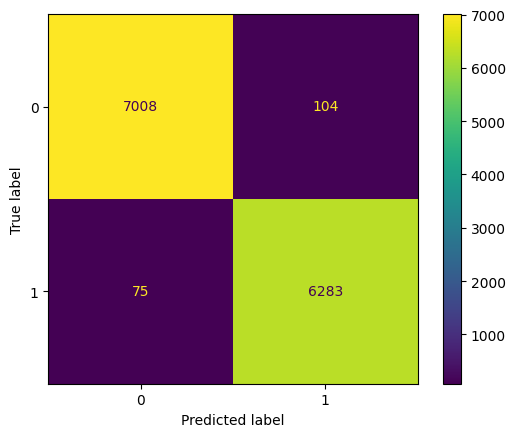

In [94]:
ConfusionMatrixDisplay.from_estimator(tfidf_log, tfidf_test_x, test_y)

## Task 3: Enhanced NLP Features